<a href="https://colab.research.google.com/github/corvusxi/phase5_project/blob/main/Credit_Card_Fraud_Logistic_Regression_and_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Show all columns
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/credit_card_fraud.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#0, Not Fraudulent
#1, Fraudulent
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Train Test Split

In [8]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53, stratify=y)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


# Models: Logistic Regression

Logistic Regression

In [11]:
steps = [("smote", SMOTE(random_state=53)),
 ("scaler", StandardScaler()),
 ("logreg", LogisticRegression(random_state=53, max_iter=1000))]

lgspipe = Pipeline(steps)

In [12]:
lgspipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=53)), ('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=53))])

In [13]:
y_pred = lgspipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.17      0.84      0.28       148

    accuracy                           0.99     85443
   macro avg       0.58      0.92      0.64     85443
weighted avg       1.00      0.99      1.00     85443



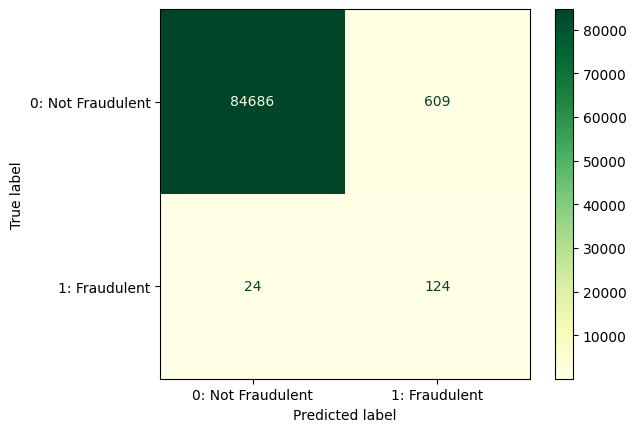

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0: Not Fraudulent", "1: Fraudulent"],
                                        colorbar=True, cmap="YlGn")
plt.grid(False);

Not bad results. Overall accuracy is 99% and type 1 recall is at 84%. A lot more False Positives (model flagged a Not Fradulent transaction as Fradulent) than True Positives, but with credit card fraud that is a lot safer than the amount of False Negatives (model flagged a Fradulent transaction as Not Fradulent!) , which is very low.

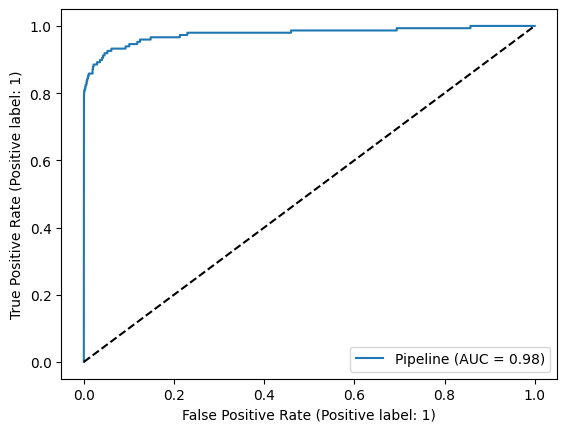

In [15]:
RocCurveDisplay.from_estimator(lgspipe, X_test, y_test)
plt.plot([0, 1], [0, 1], "k--");

Tuning

In [16]:
Clist = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4]
cvscores = []
cvscoresstd = []

for c in Clist:
    logreg = LogisticRegression(C=c, max_iter=1000)
    cvloopresults = cross_validate(X=X_train, y=y_train, estimator=logreg, cv=5)
    cvscores.append(np.mean(cvloopresults["test_score"]))
    cvscoresstd.append(np.std(cvloopresults["test_score"]))

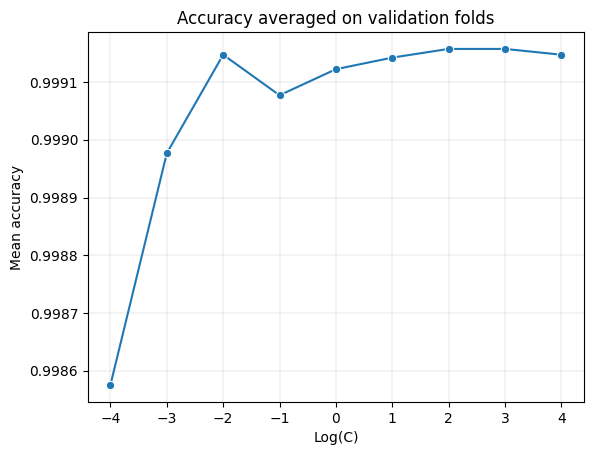

In [17]:
fig, ax = plt.subplots()
sns.lineplot(x=np.log10(Clist), y=cvscores, marker="o", ax=ax)
ax.set_xlabel("Log(C)")
ax.set_ylabel("Mean accuracy")
ax.set_title("Accuracy averaged on validation folds")
plt.grid(linewidth=0.2)
plt.show()

Cross Validation Scores

In [18]:
cvscores

[0.9985754695918772,
 0.9989767441401731,
 0.9991472877479495,
 0.9990770640352542,
 0.9991222073653271,
 0.9991422720739873,
 0.9991573201022799,
 0.9991573198506783,
 0.9991472879995509]

In [19]:
cvscoresstd

[8.601225193978155e-05,
 0.00025050586305455034,
 9.112556510506919e-05,
 0.0002153983835122857,
 0.0001609879939545243,
 9.167295076945369e-05,
 9.464192816923536e-05,
 0.00010473939054083302,
 0.000106407141073695]

In [20]:
lreditsteps = [("smote", SMOTE(random_state=53)),
 ("scaler", StandardScaler()),
 ("logreg", LogisticRegression(C=100, random_state=53, max_iter=1000))]

lreditpipe = Pipeline(lreditsteps)

In [21]:
lreditpipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=53)), ('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=100, max_iter=1000, random_state=53))])

In [22]:
lreditpipe.score(X_test,y_test)

0.9927319967697763

In [23]:
y_pred = lreditpipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.17      0.84      0.29       148

    accuracy                           0.99     85443
   macro avg       0.59      0.92      0.64     85443
weighted avg       1.00      0.99      1.00     85443



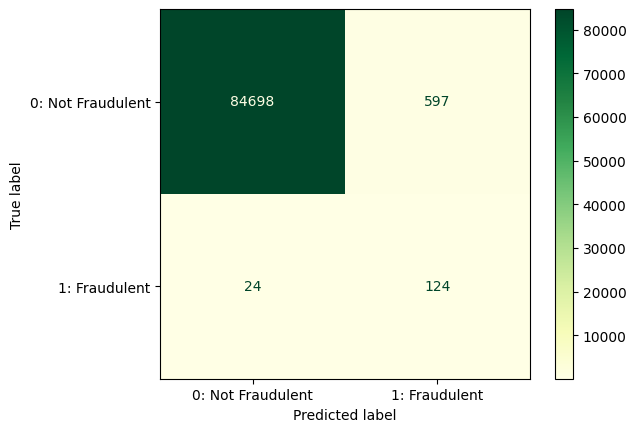

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0: Not Fraudulent", "1: Fraudulent"],
                                        colorbar=True, cmap="YlGn")
plt.grid(False);

After tuning with C at 100, results have the same metrics. However, some of the False Positives moved into True Positives. The False Negatives and True Negatives count remained the same.

In [25]:
y_prob = lreditpipe.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

In [26]:
thresholds[1::]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999993e-01, 9.99947333e-01,
       9.99944635e-01, 9.99166598e-01, 9.98546742e-01, 9.69939895e-01,
       9.69566594e-01, 9.66047317e-01, 9.61068508e-01, 9.14402784e-01,
       9.13315837e-01, 8.43987741e-01, 8.43400301e-01, 8.18938958e-01,
       8.18842221e-01, 7.93158080e-01, 7.92677954e-01, 7.45874513e-01,
       7.45613868e-01, 5.75020971e-01, 5.74329753e-01, 5.44013987e-01,
       5.43467706e-01, 4.44351526e-01, 4.44234896e-01, 3.88320093e-01,
       3.88055418e-01, 3.51912821e-01, 3.51683781e-01, 2.49888748e-01,
       2.49653351e-01, 2.48245782e-01, 2.48194499e-01, 2.23763327e-01,
       2.23322588e-01, 2.11679179e-01, 2.11642419e-01, 1.68406475e-01,
       1.68356471e-01, 1.46338601e-01, 1.46337365e-01, 1.44840825e-01,
       1.44787946e-01, 1.32140197e-01, 1.32095985e-01, 1.30023884e-01,
      

In [27]:
dfthresh = pd.DataFrame({"threshold": thresholds, "tpr":  tpr, "fpr": fpr}).iloc[1::, :]
dfthresh.head(10)

,threshold,tpr,fpr
1,1.0,0.628378,0.000152
2,1.0,0.662162,0.000164
3,1.0,0.682432,0.000164
4,1.0,0.689189,0.000164
5,1.0,0.695946,0.000188
6,1.0,0.709459,0.000188
7,1.0,0.756757,0.000188
8,1.0,0.756757,0.000199
9,1.0,0.777027,0.000199
10,1.0,0.777027,0.000211


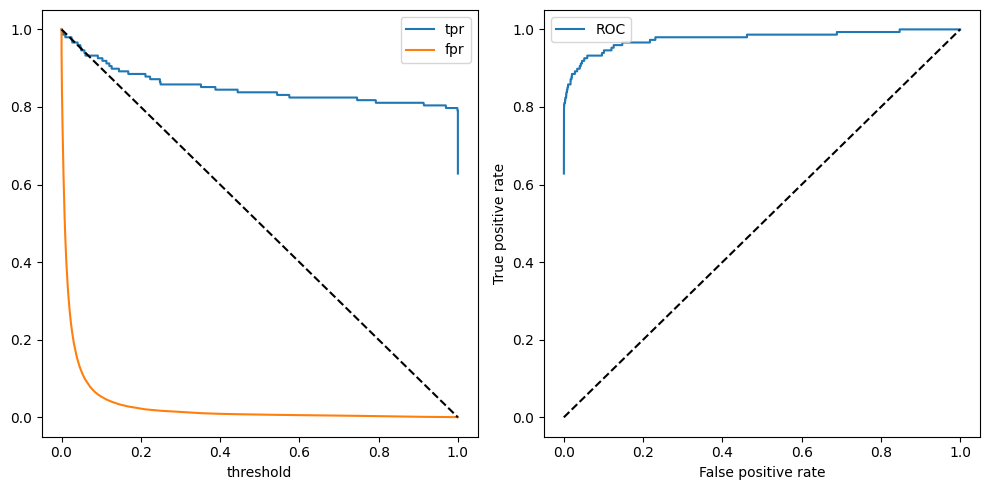

In [28]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
dfthresh.plot(x="threshold", y="tpr", ax=ax[0])
dfthresh.plot(x="threshold", y="fpr", ax=ax[0])
dfthresh.plot(x="fpr", y="tpr", ax=ax[1], label="ROC")
ax[1].set_ylabel("True positive rate")
ax[1].set_xlabel("False positive rate")
ax[0].plot([0, 1], [1, 0],"k--")
ax[1].plot([0, 1], [0, 1],"k--")
plt.tight_layout()

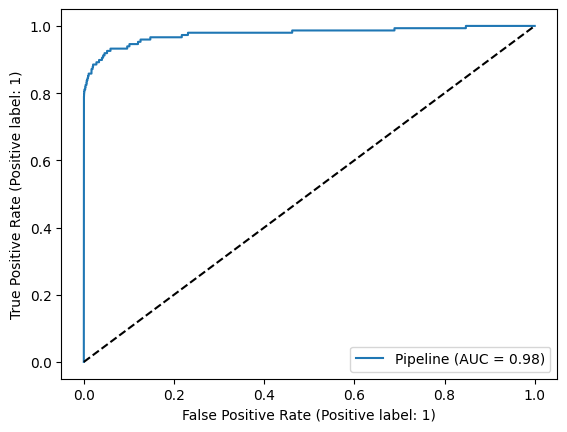

In [29]:
RocCurveDisplay.from_estimator(lreditpipe, X_test, y_test)
plt.plot([0, 1], [0, 1], "k--");

# RFECV

In [31]:
min_features_to_select = 1
logreg = LogisticRegression(C=100, random_state=53, max_iter=1000)
cv = StratifiedKFold(5)

select = RFECV(estimator=logreg, step=1, cv=cv, scoring="recall", min_features_to_select=min_features_to_select, n_jobs=2)
select = select.fit(X, y)

print("Feature ranking: ", select.ranking_)

Feature ranking:  [16  7  8  9  1  1  5 11  1  1  1 12  6  1  1  3  1 13 14  4  1  1  1  1
  1  2 10  1  1 15]


In [32]:
mask = select.get_support()
arr = df.to_numpy()
features = array(X.columns)
best_features = features[mask]

print("Best Features: ", best_features.shape[0])
print(features[mask])

Best Features:  15
['V4' 'V5' 'V8' 'V9' 'V10' 'V13' 'V14' 'V16' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V27' 'V28']


In [33]:
dfr = df[["V4", "V5", "V8", "Class"]]
dfr

,V4,V5,V8,Class
0,1.378155,-0.338321,0.098698,0
1,0.448154,0.060018,0.085102,0
2,0.379780,-0.503198,0.247676,0
3,-0.863291,-0.010309,0.377436,0
4,0.403034,-0.407193,-0.270533,0
...,...,...,...,...
284802,-2.066656,-5.364473,7.305334,0
284803,-0.738589,0.868229,0.294869,0
284804,-0.557828,2.630515,0.708417,0
284805,0.689799,-0.377961,0.679145,0


<Figure size 640x480 with 0 Axes>

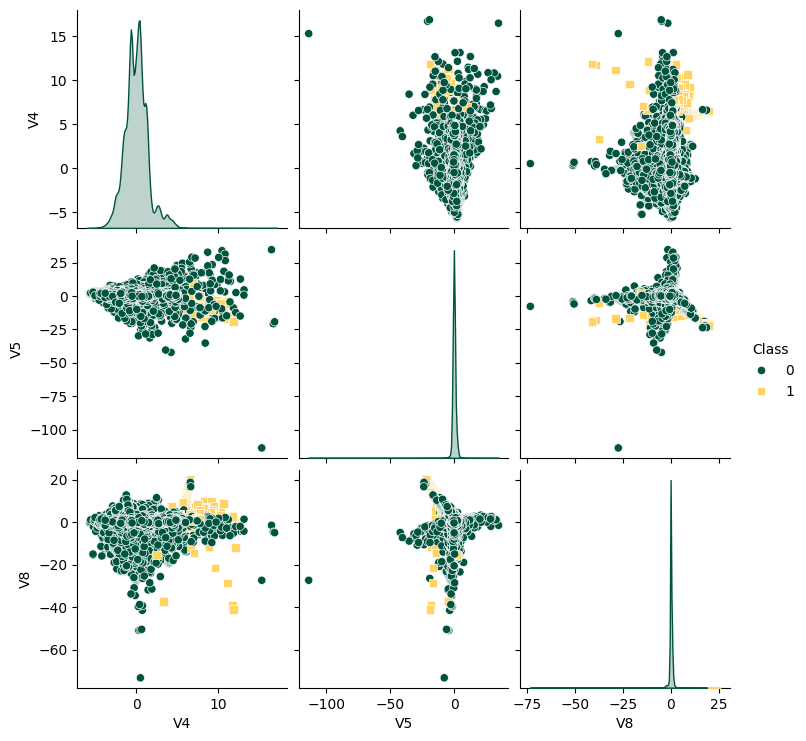

In [40]:
colors = ["#00533E", "#FFD464"]
sns.set_palette(sns.color_palette(colors))
plt.figure();
sns.pairplot(dfr, hue="Class", markers=["o", "s"])
plt.show();